# 2. 지도학습 알고리즘 (분류, 회귀 알고리즘)

In [26]:
import warnings, platform
from IPython.display import display, HTML

In [27]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [93]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## [연습문제]

### 1-1. 다음은 인도 벵갈루루의 집값 데이터이다. 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다. 데이터 컬럼 정의서는 아래와 같을 때, 선형 회귀 분석을 수행하시오. (데이터 링크는 아래 코드 참조)

In [1]:
realestate = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
print(realestate)

     area_type  availability  size  total_sqft  bath  balcony   price
0        Super             0     3      1056.0     2        1   39.07
1         Plot             1     6      2600.0     5        3  120.00
2        Super             1     5      1521.0     3        1   95.00
3        Super             1     3      1170.0     2        1   38.00
4         Plot             1     6      2785.0     5        3  295.00
...        ...           ...   ...         ...   ...      ...     ...
7490     Super             1     5      1345.0     2        1   57.00
7491     Super             1     5      1715.0     3        3  112.00
7492  Built-up             1     8      3453.0     4        0  231.00
7493  Built-up             1     3      1141.0     2        1   60.00
7494     Super             0     7      4689.0     4        1  488.00

[7495 rows x 7 columns]


In [4]:
import statsmodels.formula.api as smf

In [9]:
model = smf.ols('price ~ area_type + availability + size + total_sqft + bath + balcony', data=realestate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:30:47   Log-Likelihood:                -42786.
No. Observations:                7495   AIC:                         8.559e+04
Df Residuals:                    7486   BIC:                         8.565e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -59.2399      3.826    -15.483      0.000     -66.740     -51.739
area_type[T.Carpet]    -0.8348     10.371     -0.080      0.936     -21.166      19.496
area_type[T.Plot]      82.9016      5.183     15.994      0.000      72.741      93.062
area_type[T.Super]      0.4783      2.375      0.201      0.840      -4.176       5.133
availability           -2.2666      2.052     -1.104      0.269      -6.290       1.757
size                   -1.2000      1.051     -1.142      0.254      -3.261       0.861
total_sqft              0.0536      0.001     45.532      0.000       0.051       0.056
bath                   32.5548      1.766     18.429      0.000      29.092      36.018
balcony                -0.8327      1.168     -0.713      0.476      -3.122       1.457
==============================================================================
Omnibus:                     9791.187   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25193500.073
Skew:                           6.314   Prob(JB):                         0.00
Kurtosis:                     286.749   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print('price를 종속변수로 하고, 나머지 변수를 독립변수로 하는 선형 회귀분석을 수행하였다.')
print('Adjusted R square는 0.52로, 데이터의 약 52%를 모델이 설명하고 있다.')


### 1-2. 앞선 모델에서 변수 area_type과 total_sqft의 교호작용항을 추가하여 회귀분석을 수행하시오.

In [10]:
model = smf.ols('price ~ area_type + availability + size + total_sqft + bath + balcony + area_type * total_sqft', data=realestate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     898.3
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:48:14   Log-Likelihood:                -42389.
No. Observations:                7495   AIC:                         8.480e+04
Df Residuals:                    7483   BIC:                         8.488e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -24.9804      4.506     -5.543      0.000     -33.814     -16.147
area_type[T.Carpet]              -17.5126     20.032     -0.874      0.382     -56.781      21.756
area_type[T.Plot]               -111.4825      8.414    -13.250      0.000    -127.976     -94.989
area_type[T.Super]               -35.4769      3.837     -9.246      0.000     -42.999     -27.955
availability                      -2.4945      1.948     -1.281      0.200      -6.313       1.324
size                               0.3771      1.005      0.375      0.707      -1.592       2.346
total_sqft                         0.0268      0.002     15.774      0.000       0.023       0.030
area_type[T.Carpet]:total_sqft     0.0075      0.014      0.518      0.604      -0.021       0.036
area_type[T.Plot]:total_sqft       0.0827      0.003     28.882      0.000       0.077       0.088
area_type[T.Super]:total_sqft      0.0240      0.002     11.409      0.000       0.020       0.028
bath                              32.8043      1.699     19.312      0.000      29.474      36.134
balcony                           -1.4086      1.108     -1.271      0.204      -3.581       0.764
==============================================================================
Omnibus:                    11017.431   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22624606.670
Skew:                           8.207   Prob(JB):                         0.00
Kurtosis:                     271.659   Cond. No.                     5.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-3. 앞선 모델에서 변수 total_sqft의 이차항을 추가하여 회귀분석을 수행하시오.

In [14]:
realestate['total_sqft_sq'] = realestate['total_sqft']**2

In [15]:
model = smf.ols('price ~ area_type + availability + size + total_sqft + bath + balcony + area_type * total_sqft + total_sqft_sq', data=realestate).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1261.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:49:31   Log-Likelihood:                -41397.
No. Observations:                7495   AIC:                         8.282e+04
Df Residuals:                    7482   BIC:                         8.291e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -39.9646      3.961    -10.090      0.000     -47.729     -32.200
area_type[T.Carpet]               53.3247     17.615      3.027      0.002      18.795      87.855
area_type[T.Plot]                  4.6099      7.765      0.594      0.553     -10.611      19.831
area_type[T.Super]               -22.1681      3.374     -6.571      0.000     -28.781     -15.555
availability                      -3.8629      1.707     -2.263      0.024      -7.209      -0.517
size                              -9.9392      0.906    -10.965      0.000     -11.716      -8.162
total_sqft                         0.1297      0.003     49.413      0.000       0.125       0.135
area_type[T.Carpet]:total_sqft    -0.0349      0.013     -2.760      0.006      -0.060      -0.010
area_type[T.Plot]:total_sqft       0.0235      0.003      8.378      0.000       0.018       0.029
area_type[T.Super]:total_sqft      0.0154      0.002      8.293      0.000       0.012       0.019
bath                              -0.8218      1.647     -0.499      0.618      -4.051       2.408
balcony                           -3.1707      0.972     -3.263      0.001      -5.076      -1.266
total_sqft_sq                  -3.487e-06   7.33e-08    -47.596      0.000   -3.63e-06   -3.34e-06
==============================================================================
Omnibus:                    12638.885   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27843106.292
Skew:                          11.072   Prob(JB):                         0.00
Kurtosis:                     300.770   Cond. No.                     5.39e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-4. 앞선 모델에서 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과를 해석하시오.

In [16]:
### 모델 선택 함수
import time
import itertools
import statsmodels.api as sm

def process_subset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    criteria = regr.aic # 모델의 AIC 이 부분을 변경하면 기준을 바꿀 수 있음
    # regr.bic
    # regr.rsquared_adj
    
    return {"model": regr, "criteria": criteria}
        
# 전진선택법
def forward(x, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(x=x, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in")
    print('Selected predictors:', best_model['model'].model.exog_names,' Criteria: ', best_model[0])
    
    return best_model

# 후진소거법
def backward(x, y, predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(process_subset(x=x, y=y, feature_set=list(combo) + ['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택. 기준에 따라 변경 필요
    best_model = models.loc[models['criteria'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names, 'Criteria: ',best_model[0] )

    return best_model

# 단계적 선택법
def stepwise_model(x, y):
    stepmodels = pd.DataFrame(columns=["criteria", "model"])
    tic = time.time()
    predictors = []
    s_model_before = process_subset(x, y, predictors + ['Intercept'])['criteria']
    print("Criteria, Before selection:", s_model_before)

    for i in range(1, len(x.columns.difference(['Intercept'])) +1):
        forward_result = forward(x=x, y=y, predictors=predictors) 
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        backward_result = backward(x=x, y=y, predictors=predictors)

        if backward_result['criteria'] < forward_result['criteria']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            s_model_before = stepmodels.loc[i]["criteria"]
            predictors = [k for k in predictors if k !='Intercept']
            print('backward')
            
        print("Criteria: ", stepmodels.loc[i]['criteria'])
        if stepmodels.loc[i]['criteria'] > s_model_before: # 기준에 따라 멈춤 기준 변경 필요
            break
        else:
            s_model_before = stepmodels.loc[i]["criteria"]
            
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (stepmodels['model'][len(stepmodels['model'])])

In [20]:
from patsy import dmatrices

In [21]:
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수
# Intercept가 포함됨
y, x = dmatrices("price ~ area_type + availability + size + total_sqft + bath + balcony + area_type * total_sqft + total_sqft_sq", data=realestate, return_type="dataframe")

In [23]:
stepwise_model(x, y).summary()

Criteria, Before selection: 91087.96004417891
Processed  12 models on 1 predictors in
Selected predictors: ['total_sqft', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5e58b350>
forward
Processed  1 models on 0 predictors in 0.001720428466796875
Selected predictors: ['Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5fd63250>
Criteria:  86602.67480949161
Processed  11 models on 2 predictors in
Selected predictors: ['total_sqft', 'total_sqft_sq', 'Intercept']  Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5e58bb50>
forward
Processed  2 models on 1 predictors in 0.0024089813232421875
Selected predictors: ['total_sqft', 'Intercept'] Criteria:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0xffff5efaa650>
Criteria:  83376.99739854608
Processed  10 models on 3 predictors in
Selected predictors: ['total_sqft', 'total

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1889.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:53:11   Log-Likelihood:                -41402.
No. Observations:                7495   AIC:                         8.282e+04
Df Residuals:                    7486   BIC:                         8.288e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
total_sqft                        0.1281      0.002     58.065      0.000       0.124       0.132
total_sqft_sq                 -3.453e-06   6.43e-08    -53.736      0.000   -3.58e-06   -3.33e-06
area_type[T.Plot]:total_sqft      0.0251      0.002     15.437      0.000       0.022       0.028
size                            -10.1406      0.774    -13.104      0.000     -11.658      -8.624
area_type[T.Super]:total_sqft     0.0161      0.002      9.024      0.000       0.013       0.020
area_type[T.Super]              -23.8755      3.148     -7.585      0.000     -30.046     -17.705
balcony                          -3.1530      0.972     -3.245      0.001      -5.058      -1.248
availability                     -4.0739      1.699     -2.398      0.017      -7.405      -0.743
Intercept                       -38.0395      3.679    -10.339      0.000     -45.252     -30.827
==============================================================================
Omnibus:                    12640.083   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27907481.909
Skew:                          11.073   Prob(JB):                         0.00
Kurtosis:                     301.116   Cond. No.                     1.38e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
print('위 선형 회귀에 stepwise selection을 적용하였고, total_sqft와 total_sqft의 제곱. area_type과 total_sqft의 곱, szie, balcony, availability가 유의한 변수로 도출되었다.')
print('결정 계수는 0.669, 수정된 결정계수 0.668로 데이터의 약 67%를 모델이 설명할 수 있다.')
print('잔차의 독립성을 판단하는 Durbin-Watson 통계량이 2에 가까워서 잔차의 독립성은 만족시키는 것으로 보이나, 잔차의 정규성을 확인하는 Jarque-Bera test의 p-value가 0.00으로 잔차가 정규분포를 따른다는 귀무가설을 기각한다.')
print('잔차들의 정규성을 만족시키기 위한 추가 작업이 필요해 보인다.')

위 선형 회귀에 stepwise selection을 적용하였고, total_sqft와 total_sqft의 제곱. area_type과 total_sqft의 곱, szie, balcony, availability가 유의한 변수로 도출되었다.
결정 계수는 0.669, 수정된 결정계수 0.668로 데이터의 약 67%를 모델이 설명할 수 있다.
잔차의 독립성을 판단하는 Durbin-Watson 통계량이 2에 가까워서 잔차의 독립성은 만족시키는 것으로 보이나, 잔차의 정규성을 확인하는 Jarque-Bera test의 p-value가 0.00으로 잔차가 정규분포를 따른다는 귀무가설을 기각한다.
잔차들의 정규성을 만족시키기 위한 추가 작업이 필요해 보인다.


## [기출문제]
### 1-1. 각 회차별로 1번 타자의 출루(1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)

- ADP 29회 기출문제: https://www.datamanim.com/dataset/ADPpb/00/29.html
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 설명 : A 야구구단의 시합 결과 중 일부를 나타낸다. 각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다. 각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 ‘수치 의미’ 열을 통해 확인 할 수 있다.  
**(각 컬럼에 대한 이미지 확인 중입니다. 다만, a1_1, a1_2, ...등은 1회차 1번 타자와 2번 타자가 어떻게 출루했는지를 나타내는 9개 범주의 변수들로 보이고, b1-b9는 1회차-9회차에 발생한 득점 합계를 의미하는 것으로 보입니다. 홈런과 희생번트의 인덱스를 확인하게 되면 다시 말씀 드리겠습니다.)**

In [29]:
baseball = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv")
baseball

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0
2,201900103,5,6,5,5,1,9,5,4,6,...,6,0,0,1,1,4,1,2,0,1
3,201900112,5,7,6,1,5,5,1,5,1,...,5,0,3,0,0,0,0,1,0,0
4,201900131,5,1,2,5,2,5,7,2,6,...,6,0,2,4,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,201902346,7,5,7,4,1,9,5,7,7,...,1,0,1,2,0,0,0,0,0,1
196,201902365,2,5,1,1,7,5,5,7,5,...,9,0,0,0,0,1,0,0,0,2
197,201902373,,7,5,6,5,9,7,5,1,...,5,0,0,0,0,0,1,0,0,0
198,201902392,6,5,5,1,1,5,6,5,5,...,7,0,0,2,1,0,0,0,2,1


In [30]:
tmp_list = list()
for i, game in enumerate(baseball.game_id.unique()):
    game_data = baseball[baseball["game_id"]==game]

    # 이닝 별로 iter
    for j in range(1, 10):
        try:
            behavior_1 = int(game_data[f'a{j}_1'][i]) # 1번 타자의 해당 이닝 데이터
        except ValueError:
            behavior_1 = 0
        try:
            behavior_2 = int(game_data[f'a{j}_2'][i]) # 2번 타자의 해당 이닝 데이터
        except ValueError:
            behavior_2 = 0

        if behavior_1==4 or behavior_2==4: # 홈런이 나왔으면 해당 이닝 패스
            continue

        try:
            score = int(game_data[f'b{j}'][i]) # 득점 데이터
        except ValueError:
            score = 0

        # 1번 타자 출루 여부
        if behavior_1 in (1, 2, 3, 6, 8):
            choollu = 1
        else:
            choollu = 0

        # 득점 여부
        if score > 1:
            score = 1
        else:
            score = 0

        inning_data = [game, j, choollu, behavior_2, score]
        tmp_list.append(inning_data)

In [31]:
baseball_df = pd.DataFrame(tmp_list, columns=["game_id", "inning", "fst_choo", "snd", "score"])
baseball_df

,game_id,inning,fst_choo,snd,score
0,201900016,1,0,5,0
1,201900016,2,0,5,0
2,201900016,3,0,5,0
3,201900016,4,0,5,0
4,201900016,5,0,5,0
...,...,...,...,...,...
1621,201902394,4,0,5,0
1622,201902394,5,1,7,0
1623,201902394,6,1,9,1
1624,201902394,7,0,5,0


In [34]:
dummy_col = pd.get_dummies(baseball_df["snd"])
dummy_col.columns = [f"snd{i}" for i in dummy_col.columns]
for col in dummy_col:
    dummy_col[col] = np.where(dummy_col[col], 1, 0)
dummy_col

,snd1,snd2,snd3,snd5,snd6,snd7,snd8,snd9
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1621,0,0,0,1,0,0,0,0
1622,0,0,0,0,0,1,0,0
1623,0,0,0,0,0,0,0,1
1624,0,0,0,1,0,0,0,0


In [35]:
baseball_df = pd.concat([baseball_df, dummy_col], axis=1)
baseball_df

,game_id,inning,fst_choo,snd,score,snd1,snd2,snd3,snd5,snd6,snd7,snd8,snd9
0,201900016,1,0,5,0,0,0,0,1,0,0,0,0
1,201900016,2,0,5,0,0,0,0,1,0,0,0,0
2,201900016,3,0,5,0,0,0,0,1,0,0,0,0
3,201900016,4,0,5,0,0,0,0,1,0,0,0,0
4,201900016,5,0,5,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,201902394,4,0,5,0,0,0,0,1,0,0,0,0
1622,201902394,5,1,7,0,0,0,0,0,0,1,0,0
1623,201902394,6,1,9,1,0,0,0,0,0,0,0,1
1624,201902394,7,0,5,0,0,0,0,1,0,0,0,0


### 1-2. 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

In [36]:
# 희생번트: snd9
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
y = baseball_df["score"]
x = baseball_df.drop(["game_id", "inning", "score", "snd"], axis=1)

In [53]:
dummy_str = " + ".join([f"snd{i}" for i in [1, 2, 3, 5, 6, 7, 8, 9]])

# Modeling
mod_glm = smf.glm(formula = f"score ~ fst_choo + {dummy_str}", data = baseball_df, family=sm.families.Binomial()).fit()
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  score   No. Observations:                 1626
Model:                            GLM   Df Residuals:                     1617
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -624.43
Date:                Sat, 14 Oct 2023   Deviance:                       1248.9
Time:                        10:19:19   Pearson chi2:                 1.49e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1608
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.85e+12   8.34e+12      0.462      0.644   -1.25e+13    2.02e+13
fst_choo       1.6166      0.156     10.394      0.000       1.312       1.921
snd1        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd2        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd3        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd5        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd6        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd7        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd8        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
snd9        -3.85e+12   8.34e+12     -0.462      0.644   -2.02e+13    1.25e+13
==============================================================================
"""

In [52]:
print('희생번트 여부의 회귀계수는 거의 0에 가까움. p-value 0.644로 유의미하지 않은 변수임')

희생번트 여부의 회귀계수는 거의 0에 가까움. p-value 0.924로 유의미하지 않은 변수임


### 1-3. SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

In [40]:
y.value_counts() # imbalance 있음

0    1333
1     293
Name: score, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [42]:
smote_sample = SMOTE(sampling_strategy='minority', random_state=0) 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1333, 1: 1333})


### 1-4. 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

In [43]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
reg = LogisticRegression()
reg.fit(x_sm, y_sm)

LogisticRegression()

In [45]:
reg.coef_[0]

array([ 1.67599094,  0.39136528,  0.72169839,  1.46639522, -1.30751819,
        0.50642016, -1.90125069,  0.8059108 , -0.68391934])

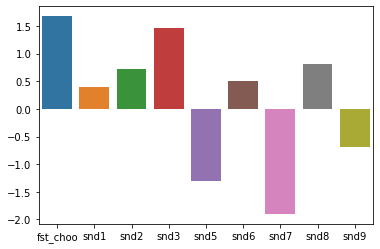

In [51]:
# 회귀 분석의 계수를 분석해보니, 가장 중요한 변수는 두 번째 타자의 삼진 여부
# 그 다음은 두번째 타자의 3루타 여부
# 첫 번째 타자의 출루와 두 번째 타자의 삼진 이외 아웃도 중요한 역할을 하고 있음
sns.barplot(x=x.columns, y=reg.coef_[0])
plt.show()

## 2. 대구 영구임대아파트 퇴거여부 데이터
- ADP 29회 기출문제: https://www.datamanim.com/dataset/ADPpb/00/29.html
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [54]:
from pandas import read_csv
estate = read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv', encoding='euc-kr')
estate

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86899,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2017,49500,3055000,60,56,남,기혼,2,미퇴거
86900,12882,해지,8,180,지산5단지아파트,3,8.0,86891,14,15,...,2018.0,2018,49500,3055000,60,57,남,기혼,2,퇴거
86901,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2018,45000,2365000,52,49,남,미혼,1,미퇴거
86902,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2019,45000,2365000,52,50,남,미혼,1,미퇴거


### 2-1. 계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [66]:
estate_new = estate.loc[estate.groupby("계약자고유번호")["거주연도"].max().index].reset_index(drop=True)
estate_new

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2014,83800,6489000,46,39,남,미혼,3,미퇴거
2,2,해지,5,108,강남아파트,5,7.0,14546,1,12,...,2012.0,2009,56500,4375000,68,56,여,미혼,1,미퇴거
3,5,유효,10,222,강남아파트,5,7.0,14572,1,15,...,NaN,2009,51300,3553000,77,65,여,미혼,2,미퇴거
4,6,유효,10,222,강남아파트,5,7.0,14598,1,15,...,NaN,2009,51300,3553000,73,61,남,미혼,3,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,12880,유효,9,236,지산5단지아파트,3,8.0,86865,14,15,...,NaN,2010,39700,2082000,60,49,남,미혼,1,미퇴거
10344,12880,유효,9,236,지산5단지아파트,3,8.0,86865,14,15,...,NaN,2011,39700,2082000,60,50,남,미혼,1,미퇴거
10345,12880,유효,9,236,지산5단지아파트,3,8.0,86865,14,15,...,NaN,2012,40900,2144000,60,51,남,미혼,1,미퇴거
10346,12881,유효,11,310,지산5단지아파트,3,8.0,86878,14,19,...,NaN,2010,88800,6888000,68,57,남,미혼,2,미퇴거


### 2-2. EDA 및 결측치 처리 (시각화 포함)

In [68]:
# 계약구분, 아파트 평점, 퇴거연도에 결측치가 있음
nulls = estate_new.isnull().sum()
nulls[nulls>0]

계약구분        61
아파트 평점     134
퇴거연도      7321
dtype: int64

In [69]:
# 아파트별로 평점은 모두 동일하므로, 각 아파트 ID별 평점으로 결측치 처리
estate_new.groupby("아파트 ID")["아파트 평점"].value_counts()

아파트 ID  아파트 평점
1       5.0       3641
2       7.0       3604
3       8.0       2651
4       10.0       200
5       7.0        118
Name: 아파트 평점, dtype: int64

In [70]:
def add_rate(id):
    return estate_new[estate_new["아파트 ID"]==id]["아파트 평점"].unique()[0]

estate_new["아파트 평점"] = estate_new["아파트 평점"].fillna(estate_new["아파트 ID"].apply(add_rate))

In [71]:
# 퇴거연도 확인
# 퇴거 연도는 미퇴거 주택의 경우 모두 NA 처리되고 그 개수가 상당히 많은 편이므로 크게 분석에서 유용하게 사용할 변수로 보이지 않음
# 퇴거여부 변수에 퇴거 연도의 일부 정보가 들어가고 있으므로 (퇴거/미퇴거) 퇴거여부 변수만 사용하고 퇴거연도는 삭제하는 게 좋겠음
estate_new[estate_new["퇴거연도"].isna()]["퇴거여부"].value_counts() # 퇴거연도가 없으면 모두 미퇴거

미퇴거    7321
Name: 퇴거여부, dtype: int64

In [72]:
estate_new.drop('퇴거연도', axis=1, inplace=True)

In [74]:
# 계약구분 확인
estate_new.loc[estate_new[estate_new["계약구분"].isna()][estate_new["퇴거여부"]=="퇴거"].index, "계약구분"] = "해지" # 퇴거 완료 계약의 해지 처리

In [75]:
nulls = estate_new.isnull().sum()
nulls[nulls>0]

계약구분    57
dtype: int64

In [76]:
# 계약구분이 NA인 변수들의 퇴거여부 다시 확인
estate_new[estate_new["계약구분"].isna()]["퇴거여부"].value_counts()

미퇴거    57
Name: 퇴거여부, dtype: int64

In [77]:
# 거주연도 + 거주개월이 2023이 넘으면 유효
ok_index = estate_new[estate_new["계약구분"].isna()][(estate_new[estate_new["계약구분"].isna()]["거주개월"]/12).apply(int) + estate_new[estate_new["계약구분"].isna()]["거주연도"] >= 2023].index
estate_new.loc[ok_index, "계약구분"] = "유효"

In [78]:
# 다른 케이스는 해지
estate_new["계약구분"] = estate_new["계약구분"].fillna("해지")

In [79]:
nulls = estate_new.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [87]:
### 분석에 필요한 컬럼만 추출
estate_new = estate_new.loc[:, list(estate_new.columns.difference(['순번', '아파트 이름', '호실고유번호', '계약서고유번호', '계약자고유번호']))]
estate_new

,거주개월,거주연도,거주자 수,결혼여부,계약구분,나이,대표나이,보증금(원),성별,아파트 ID,아파트 평점,월세(원),입주연도,재계약횟수,층,퇴거여부,평형대
0,222,2009,3,미혼,유효,34,46,4375000,남,5,7.0,56500,2003,10,1,미퇴거,12
1,222,2014,3,미혼,유효,39,46,6489000,남,5,7.0,83800,2003,10,1,미퇴거,12
2,108,2009,1,미혼,해지,56,68,4375000,여,5,7.0,56500,2003,5,1,미퇴거,12
3,222,2009,2,미혼,유효,65,77,3553000,여,5,7.0,51300,2003,10,1,미퇴거,15
4,222,2009,3,미혼,유효,61,73,3553000,남,5,7.0,51300,2003,10,1,미퇴거,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,236,2010,1,미혼,유효,49,60,2082000,남,3,8.0,39700,2001,9,14,미퇴거,15
10344,236,2011,1,미혼,유효,50,60,2082000,남,3,8.0,39700,2001,9,14,미퇴거,15
10345,236,2012,1,미혼,유효,51,60,2144000,남,3,8.0,40900,2001,9,14,미퇴거,15
10346,310,2010,2,미혼,유효,57,68,6888000,남,3,8.0,88800,1995,11,14,미퇴거,19


In [88]:
cat_col = ['결혼여부', '계약구분', '성별', '퇴거여부']
num_col = list(estate_new.columns.difference(cat_col))

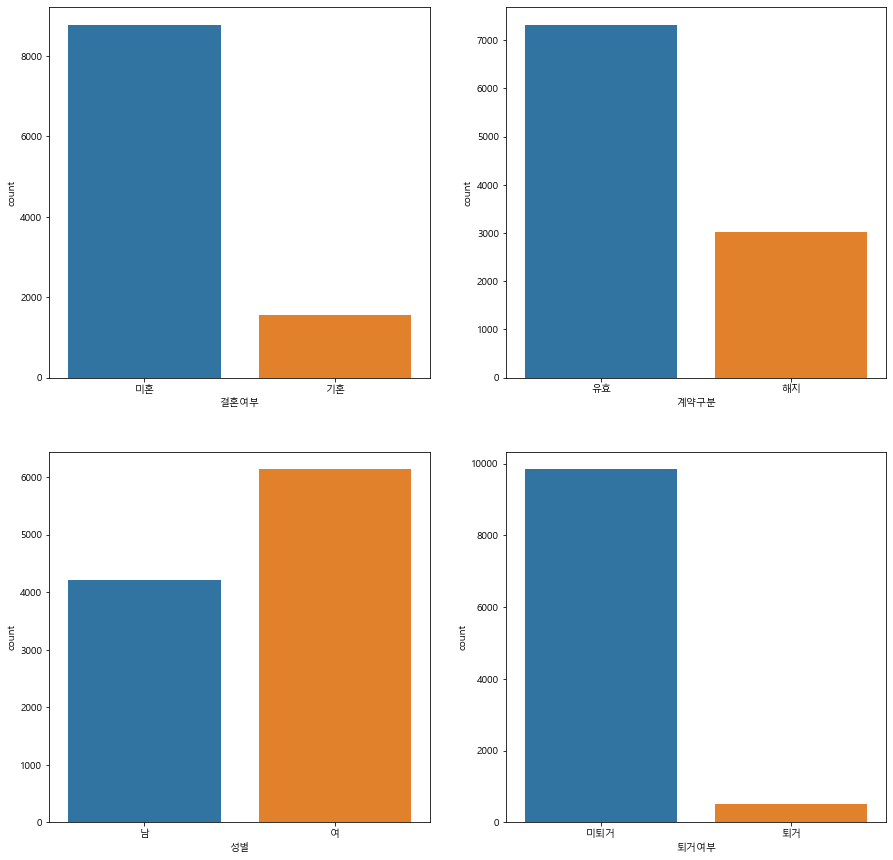

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i, col in enumerate(cat_col):
    row_ = i//2
    col_ = i%2
    
    sns.countplot(estate_new[col], ax=axes[row_][col_])

In [95]:
print('카테고리 변수를 barplot으로 시각화해 본 결과, 각 변수별로 클래스 빈도에 차이가 있는 것을 확인할 수 있다.')
print('계약자 중에는 미혼, 여성이 많았으며, 유효한 계약의 건수가 더 많았다. 또한, 아직 퇴거하지 않은 계약이 더 많음을 확인할 수 있다.')

카테고리 변수를 barplot으로 시각화해 본 결과, 각 변수별로 클래스 빈도에 차이가 있는 것을 확인할 수 있다.
계약자 중에는 미혼, 여성이 많았으며, 유효한 계약의 건수가 더 많았다. 또한, 아직 퇴거하지 않은 계약이 더 많음을 확인할 수 있다.


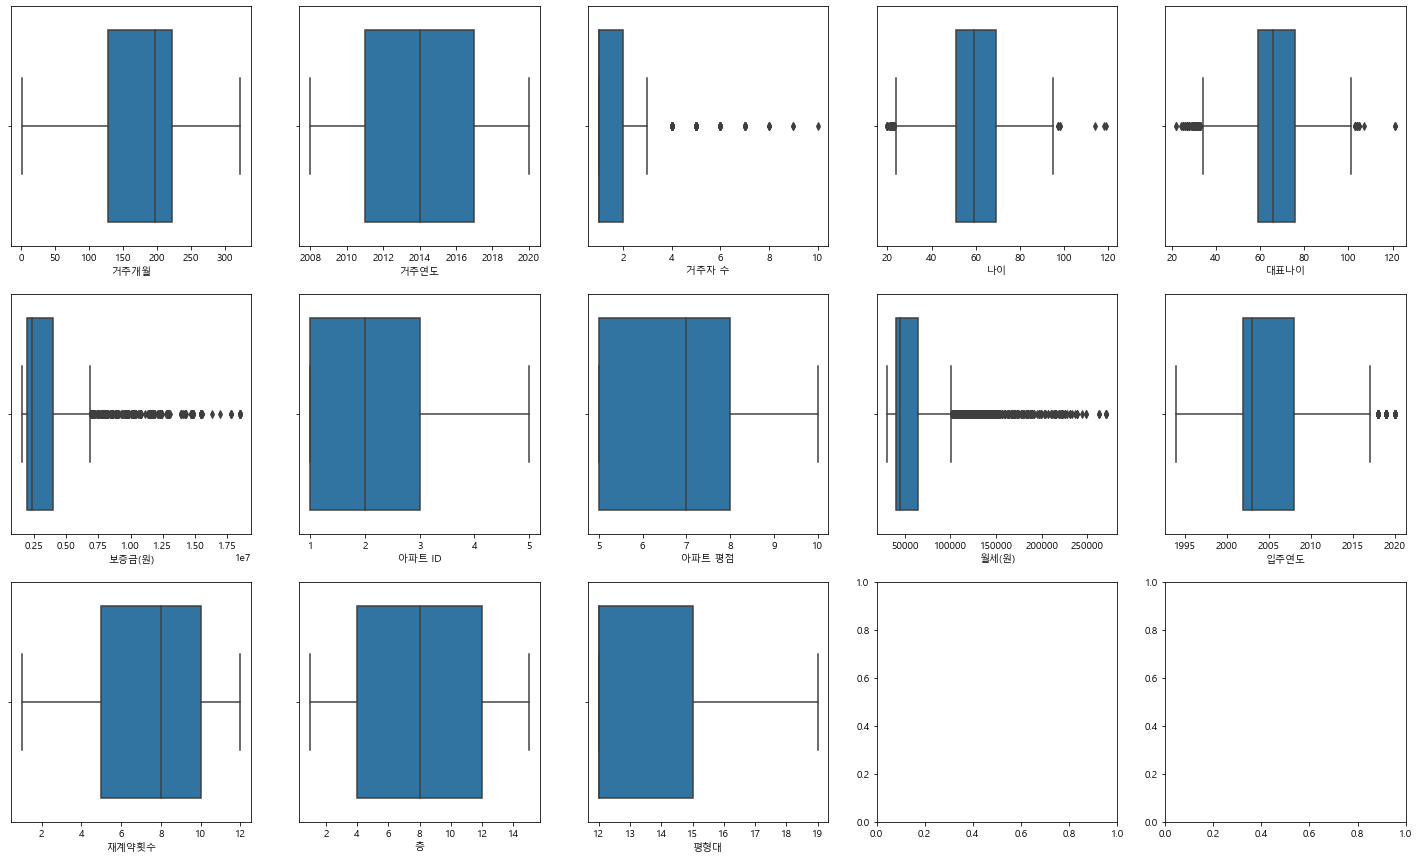

In [97]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15))

for i, col in enumerate(num_col):
    row_ = i//5
    col_ = i%5
    
    sns.boxplot(estate_new[col], ax=axes[row_][col_])

In [98]:
print('수치형 변수는 boxplot으로 시각화했으며, 일부 변수에서 이상치가 다수 발견되고 있음이 확인된다.')

수치형 변수는 boxplot으로 시각화했으며, 일부 변수에서 이상치가 다수 발견되고 있음이 확인된다.


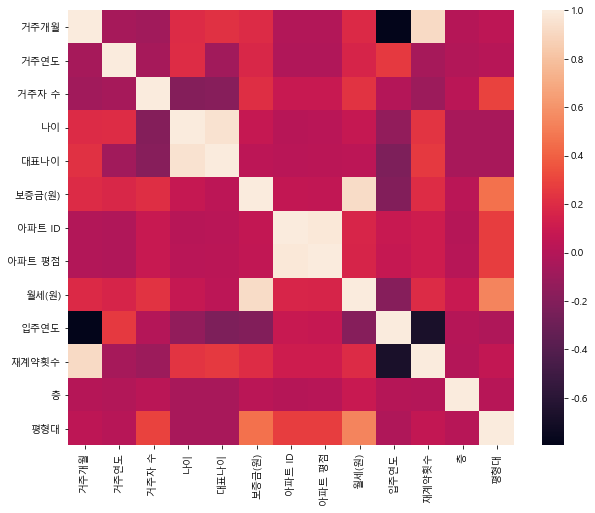

In [104]:
plt.figure(figsize=[10, 8])
sns.heatmap(estate_new.corr(method='spearman'))
plt.show()

In [105]:
print('각 변수 간 상관계수를 살펴보니, 일부 변수에서 높은 양의 상관, 음의 상관이 존재한다.')

각 변수 간 상관계수를 살펴보니, 일부 변수에서 높은 양의 상관, 음의 상관이 존재한다.


### 2-3. 이상치 처리

In [106]:
print('앞선 EDA의 boxplot을 살펴봤을 때 Outlier가 존재하는 column은 거주자 수, 나이, 대표나이, 보증금, 월세, 입주연도이다.')
print('거주자 수, 입주연도의 경우 outlier의 값이 합리적이므로 별도 처리가 필요하지 않아 보인다.')
print('보증금과 월세의 경우 이상치가 있지만, 이를 실제 이상치로 볼 건지, 어떻게 처리할 것인지에 대한 방법은 현업의 의견이 필요하다. 우선은 이상치의 영향을 줄이기 위해 로그 변환을 수행한다.')
print('나이 변수의 경우, 클리핑을 적용하였다. 100세 이상의 경우 100으로 나이를 조정한다.') 

앞선 EDA의 boxplot을 살펴봤을 때 Outlier가 존재하는 column은 거주자 수, 나이, 대표나이, 보증금, 월세, 입주연도이다.
거주자 수, 입주연도의 경우 outlier의 값이 합리적이므로 별도 처리가 필요하지 않아 보인다.
보증금과 월세의 경우 이상치가 있지만, 이를 실제 이상치로 볼 건지, 어떻게 처리할 것인지에 대한 방법은 현업의 의견이 필요하다. 우선은 이상치의 영향을 줄이기 위해 로그 변환을 수행한다.
나이 변수의 경우, 클리핑을 적용하였다. 100세 이상의 경우 100으로 나이를 조정한다.


In [107]:
### 나이 변환 
estate_new.loc[estate_new['나이']>=100, '나이'] = 100
estate_new.loc[estate_new['대표나이']>=100, '대표나이'] = 100

In [113]:
### 보증금, 월세 log 변환
# skew 확인
print(estate_new["보증금(원)"].min())
print(estate_new['월세(원)'].min())

1520000
31300


In [114]:
# 모두 양수이므로, log1p 사용하지 않고 log 사용
estate_new["보증금(원)_log"] = np.log(estate_new["보증금(원)"])
estate_new["월세(원)_log"] = np.log(estate_new["월세(원)"])

### 2-4. 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

In [115]:
estate_new["재계약빈도"] = np.where(estate_new["재계약횟수"]>=estate_new["재계약횟수"].median(), '높음', '낮음')

### 2-5. 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

In [130]:
print('앞선 EDA에서 선형 상관성이 높은 변수가 확인되었으므로, 상관성이 높은 일부 변수를 차원 축소를 통해 제거할 수 있을 것으로 판단된다.')
print('나이와 대표나이, 보증금과 월세, 아파트 ID와 평점의 양의 상관성이 높고, 거주개월과 입주연도의 음의 상관성이 높다. 각 변수들 중 더 많은 정보를 담고 있을 것으로 생각되는 나이, 월세, 평점, 거주개월 변수를 선택하고, 선택되지 않은 변수는 제거한다.')

앞선 EDA에서 선형 상관성이 높은 변수가 확인되었으므로, 상관성이 높은 일부 변수를 차원 축소를 통해 제거할 수 있을 것으로 판단된다.
나이와 대표나이, 보증금과 월세, 아파트 ID와 평점의 양의 상관성이 높고, 거주개월과 입주연도의 음의 상관성이 높다. 각 변수들 중 더 많은 정보를 담고 있을 것으로 생각되는 나이, 월세, 평점, 거주개월 변수를 선택하고, 선택되지 않은 변수는 제거한다.


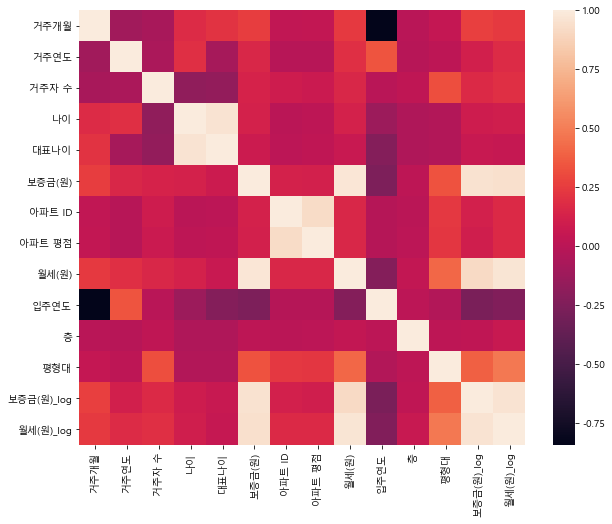

In [123]:
### 수치형 변수 확인
plt.figure(figsize=[10, 8])
sns.heatmap(estate_new.drop(cat_col + ["재계약횟수"], axis=1).corr()) # 종속변수와 일부 문자형 데이터를 제외하고 상관성 확인
plt.show()

In [127]:
### Label encoding
from sklearn.preprocessing import LabelEncoder

In [128]:
for col in cat_col:
    encoder = LabelEncoder()
    encoder.fit(estate_new[col])
    estate_new[col] = encoder.transform(estate_new[col])

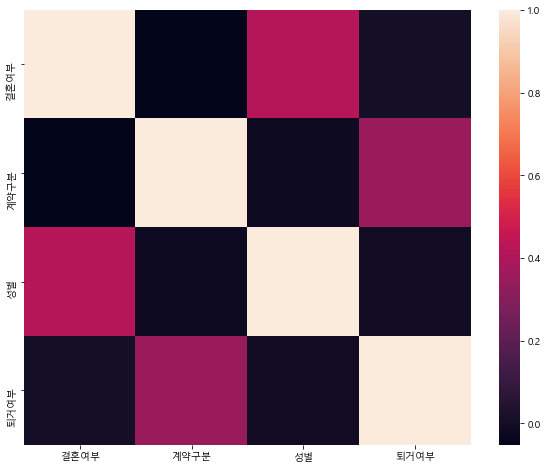

In [129]:
# 범주형 변수들의 상관성 확인
# 일부 상관성이 보이는 변수들이 있으나, 크지는 않은 편
plt.figure(figsize=[10, 8])
sns.heatmap(estate_new.loc[:, cat_col].corr(method='spearman'))

In [131]:
estate_new = estate_new.drop(["월세(원)", "보증금(원)"], axis=1) # 불필요 변수 제거 

In [132]:
# 상관성 높음 변수 제거
estate_model = estate_new.drop(["대표나이", "보증금(원)_log", "아파트 ID", "입주연도"], axis=1)
estate_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   거주개월       10348 non-null  int64  
 1   거주연도       10348 non-null  int64  
 2   거주자 수      10348 non-null  int64  
 3   결혼여부       10348 non-null  int64  
 4   계약구분       10348 non-null  int64  
 5   나이         10348 non-null  int64  
 6   성별         10348 non-null  int64  
 7   아파트 평점     10348 non-null  float64
 8   재계약횟수      10348 non-null  int64  
 9   층          10348 non-null  int64  
 10  퇴거여부       10348 non-null  int64  
 11  평형대        10348 non-null  int64  
 12  월세(원)_log  10348 non-null  float64
 13  재계약빈도      10348 non-null  object 
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


### 2-6. 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [133]:
estate_model.groupby("재계약빈도").mean(numeric_only=True) 

,거주개월,거주연도,거주자 수,결혼여부,계약구분,나이,성별,아파트 평점,재계약횟수,층,퇴거여부,평형대,월세(원)_log
재계약빈도,,,,,,,,,,,,,
낮음,113.764308,2014.044389,1.813655,0.856242,0.495043,56.792023,0.550023,6.477467,4.675304,8.006084,0.101622,13.362325,10.783225
높음,220.388494,2013.879357,1.597293,0.843147,0.139932,61.646024,0.625212,6.699154,9.487986,7.963452,0.010152,13.681387,10.962554


In [135]:
print('재계약빈도가 높은 클러스터가 거주 개월수가 높고, 퇴거 비율도 적음. 또한, 거주자 수가 적은 편이며 월세도 상대적으로 높은 편이다. 여성 계약자가 많으며, 퇴거 비율이 상대적으로 낮은 것도 특징이다.')

재계약빈도가 높은 클러스터가 거주 개월수가 높고, 퇴거 비율도 적음. 또한, 거주자 수가 적은 편이며 월세도 상대적으로 높은 편이다. 여성 계약자가 많으며, 퇴거 비율이 상대적으로 낮은 것도 특징이다.


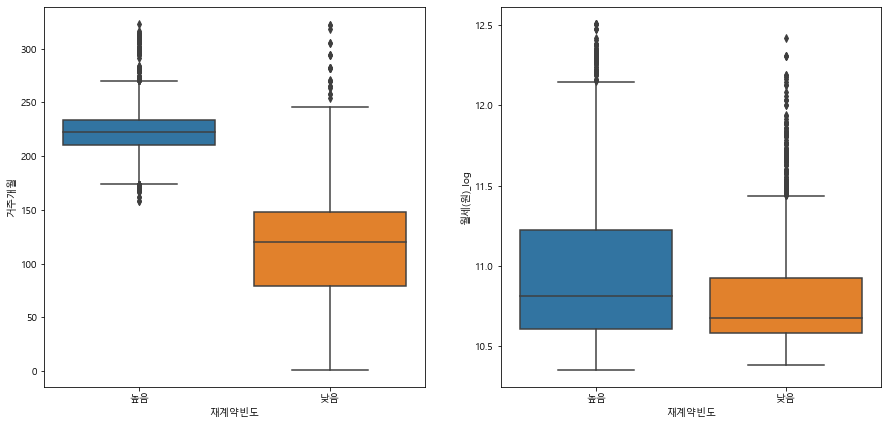

In [137]:
### 재계약 빈도에 따른 거주개월과 월세
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))

sns.boxplot(data=estate_model, x="재계약빈도", y="거주개월", ax=axes[0])
sns.boxplot(data=estate_model, x="재계약빈도", y="월세(원)_log", ax=axes[1])
plt.show()

In [138]:
# 재계약빈도가 높은 클러스터에서, 유효한 계약이 많음
estate_model.groupby("재계약빈도")["계약구분"].value_counts(1)

재계약빈도  계약구분
낮음     0       0.504957
       1       0.495043
높음     0       0.860068
       1       0.139932
Name: 계약구분, dtype: float64

In [144]:
# 재계약빈도가 높은 클러스터에서, 여성이 많음
estate_model.groupby("재계약빈도")["성별"].value_counts(1)

재계약빈도  성별
낮음     1     0.550023
       0     0.449977
높음     1     0.625212
       0     0.374788
Name: 성별, dtype: float64

In [145]:
# 재계약빈도가 높은 클러스터에서, 퇴거 비율이 낮음
estate_model.groupby("재계약빈도")["퇴거여부"].value_counts(1)

재계약빈도  퇴거여부
낮음     0       0.898378
       1       0.101622
높음     0       0.989848
       1       0.010152
Name: 퇴거여부, dtype: float64

### 2-7. 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [157]:
y = estate_model['재계약횟수']
x = estate_model.drop(['재계약횟수', '재계약빈도'], axis=1)

In [151]:
from sklearn.model_selection import train_test_split

In [159]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [160]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [167]:
### 재계약횟수
rf = RandomForestRegressor()
rf.fit(train_x, train_y)
pred_rf = rf.predict(test_x)

xgb = XGBRegressor()
xgb.fit(train_x, train_y)
pred_xgb = xgb.predict(test_x)

print(f'Random Forest RMSE: {round(mean_squared_error(pred_rf, test_y, squared=False), 4)}')
print(f'XGBoost RMSE: {round(mean_squared_error(pred_xgb, test_y, squared=False), 4)}')

[11:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest RMSE: 0.7127
XGBoost RMSE: 0.7409


In [168]:
print('회귀 분석 방법론 중 성능이 좋다고 알려져 있는 XGBoost와 RandomForest를 활용하여 회귀 분석을 진행하였고, RMSE 값이 더 낮은 Random Forest 알고리즘을 선정하였다.')

회귀 분석 방법론 중 성능이 좋다고 알려져 있는 XGBoost와 RandomForest를 활용하여 회귀 분석을 진행하였고, RMSE 값이 더 낮은 Random Forest 알고리즘을 선정하였다.


### 2-8. 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

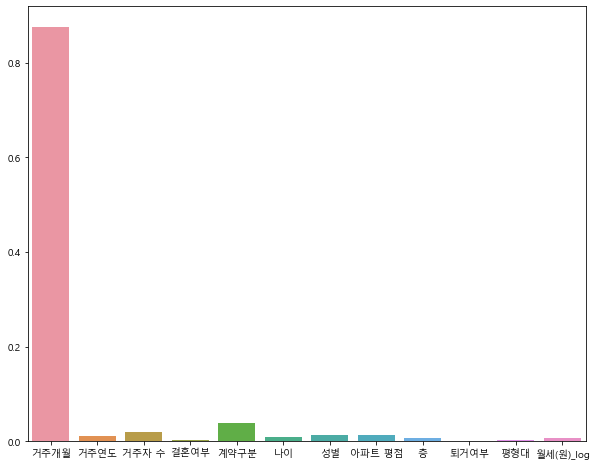

In [170]:
plt.figure(figsize=(10, 8))
sns.barplot(x=train_x.columns, y=xgb.feature_importances_) # 회귀
plt.show()

In [173]:
train_x.columns

Index(['거주개월', '거주연도', '거주자 수', '결혼여부', '계약구분', '나이', '성별', '아파트 평점', '층',
       '퇴거여부', '평형대', '월세(원)_log'],
      dtype='object')

In [172]:
xgb.feature_importances_

array([0.8758117 , 0.01105784, 0.01982258, 0.00309155, 0.03776656,
       0.00981288, 0.01227038, 0.01413659, 0.0064166 , 0.        ,
       0.00256204, 0.00725146], dtype=float32)

In [174]:
print('모델의 변수 중요도를 확인해 본 결과, 재계약 횟수를 종속변수로 하는 회귀분석의 경우 거주개월 변수가 압도적인 영향을 끼치고 있음. 따라서 거주개월이 길수록 재계약 횟수도 높아진다고 볼 수 있는데, 이는 통념상 당연한 결과로 볼 수 있음')
print('그 다음으로 영향도가 높은 변수는 계약구분, 거주자 수, 아파트 평점으로 나타났음.')

모델의 변수 중요도를 확인해 본 결과, 재계약 횟수를 종속변수로 하는 회귀분석의 경우 거주개월 변수가 압도적인 영향을 끼치고 있음. 따라서 거주개월이 길수록 재계약 횟수도 높아진다고 볼 수 있는데, 이는 통념상 당연한 결과로 볼 수 있음
그 다음으로 영향도가 높은 변수는 계약구분, 거주자 수, 아파트 평점으로 나타났음.


### 2-9. 해당 데이터 분석결과로 얻을 수 있는 점 제시

In [175]:
print('재계약율을 높이려면, 거주하는 기간이 길어야 한다. 즉, 거주의 만족도가 높아야 재계약율이 올라간다고 볼 수 있다. 따라서, 거주의 만족도를 높일 수 있는 정책을 펼쳐야 한다.')
print('재계약횟수에 영향을 미쳤던 다른 변수로는 거주자 수와 아파트 평점이 있다. 거주자 수가 적고, 아파트 평점이 높을수록 재계약 횟수가 높아지는 경향이 있으므로, 적당한 거주자 수를 유지하여 삶의 질을 높이고, 주기적인 아파트 관리를 통해 주거 환경을 개선하는 것도 중요하다.')

재계약율을 높이려면, 거주하는 기간이 길어야 한다. 즉, 거주의 만족도가 높아야 재계약율이 올라간다고 볼 수 있다. 따라서, 거주의 만족도를 높일 수 있는 정책을 펼쳐야 한다.
재계약횟수에 영향을 미쳤던 다른 변수로는 거주자 수와 아파트 평점이 있다. 거주자 수가 적고, 아파트 평점이 높을수록 재계약 횟수가 높아지는 경향이 있으므로, 적당한 거주자 수를 유지하여 삶의 질을 높이고, 주기적인 아파트 관리를 통해 주거 환경을 개선하는 것도 중요하다.
